In [1]:
from subpred.protein_go_datasets import get_transmembrane_transporter_dataset, get_stats

In [2]:
ORGANISMS = [3702]  # athaliana 3702 yeast 559292 human 9606 ecoli 83333
GO_TERM = "sugar transmembrane transporter activity"
# GO_TERM = "amino acid transmembrane transporter activity",
IDENTITY_THRESHOLD = 70
TEST_NAME = "svc_at_sugarvsrest"
FEATURES_FOLDER = "../data/tmp_data/"  # to share between environments
RESULTS_FOLDER = "../data/results/"
RECALCULATE_RESULTS = True  # If false, use cached results, e.g. to create more plots

## Full dataset

In [3]:
dataset_unfiltered = get_transmembrane_transporter_dataset(  # yeast
    organism_ids=ORGANISMS,
    swissprot_only=False,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=False,
    max_sequence_evidence_code=2,
    remove_proteins_without_gene_names=False,
)
get_stats(*dataset_unfiltered)

cd-hit: clustered 1773 sequences into 646 clusters at threshold 50
cd-hit: clustered 1773 sequences into 923 clusters at threshold 70
cd-hit: clustered 1773 sequences into 1203 clusters at threshold 90
cd-hit: clustered 1773 sequences into 1554 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence   protein_existence_evidence clustering                   
False              False         computational protein_level              100                      3   
                                                                          None                     3   
                                               transcript_level           50                       3   
                                                                          70                       4   
                                                                          90                       7   
                                                                          100                     37   
                                                                          None                    49   
                   True          computational protein_level              50                      87   
                                                                          70                     114   
                                                                          90                     153   
                                                                          100                    329   
                                                                          None                   433   
                                               transcript_level           50                       7   
                                                                          70                      13   
                                                                          90                      19   
                                                                          100                     84   
                                                                          None                   164   
                                 experiment    protein_level              50                      25   
                                                                          70                      33   
                                                                          90                      38   
                                                                          100                     41   
                                                                          None                    42   
                                               transcript_level           50                       3   
                                                                          70                       5   
                                                                          90                       5   
                                                                          100                      6   
                                                                          None                     6   
True               True          computational protein_level              50                     206   
                                                                          70                     287   
                                                                          90                     370   
                                                                          100                    408   
                                                                          None                   418   
                                               transcript_level           50                     208   
                                                                          70                     338   
                                                                          90                     462   
                                                                          100                    492   
                                                                          None                   504   
                              

## Filtered Subset

In [4]:
dataset_organism = get_transmembrane_transporter_dataset(  # organism
    organism_ids=ORGANISMS,
    swissprot_only=True,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=True,
    max_sequence_evidence_code=1,
    remove_proteins_without_gene_names=True,
)
get_stats(*dataset_organism)

cd-hit: clustered 420 sequences into 276 clusters at threshold 50
cd-hit: clustered 420 sequences into 344 clusters at threshold 70
cd-hit: clustered 420 sequences into 403 clusters at threshold 90
cd-hit: clustered 420 sequences into 419 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering                   
True               True          experiment  protein_level              50                     276   
                                                                        70                     344   
                                                                        90                     403   
                                                                        100                    419   
                                                                        None                   420   

                                                                                    n_terms  
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering           
True               True          experiment  protein_level              50              264  
                                                                        70              281  
                                                                        90              288  
                                                                        100             288  
                                                                        None            288

## Sugar/Amino subset

In [5]:
from subpred.dataset_filters import get_proteome_classification_subset

dataset_organism = get_proteome_classification_subset(
    dataset_full=dataset_organism, go_term=GO_TERM
)

print("before clustering:")
dataset_organism[1].go_term_ancestor.value_counts()

before clustering:


go_term_ancestor
!!NOT|sugar transmembrane transporter activity    388
sugar transmembrane transporter activity           32
Name: count, dtype: int64

In [6]:
from subpred.dataset_filters import filter_no_3Di_available

dataset_organism = filter_no_3Di_available(dataset_organism)
dataset_organism[1].go_term_ancestor.value_counts()

go_term_ancestor
!!NOT|sugar transmembrane transporter activity    386
sugar transmembrane transporter activity           32
Name: count, dtype: int64

Clustering at 70%

In [7]:
from subpred.dataset_filters import cluster_sequences

dataset_organism = cluster_sequences(
    dataset_full=dataset_organism, identity_threshold=IDENTITY_THRESHOLD
)
dataset_organism[1].go_term_ancestor.value_counts()

cd-hit: clustered 418 sequences into 342 clusters at threshold 70


go_term_ancestor
!!NOT|sugar transmembrane transporter activity    316
sugar transmembrane transporter activity           26
Name: count, dtype: int64

## Feature generation

In [8]:
from subpred.features import get_features

features_list, series_labels = get_features(
    dataset_full=dataset_organism, include_pssm_features=False
)

2025-05-30 22:51:21.635726: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-30 22:51:21.641671: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748638281.647481  106409 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748638281.649443  106409 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-30 22:51:21.656625: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

For each Feature: Outlier detection, numpy conversion 

In [9]:
from subpred.features import get_ml_datasets

ml_datasets = list(get_ml_datasets(features_list=features_list, series_labels=series_labels))
ml_datasets

[Name: DUMMY, Features: 1024, Samples: 342, Classes: [0 1], Labels: ['!!NOT|sugar transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: AAC, Features: 20, Samples: 342, Classes: [0 1], Labels: ['!!NOT|sugar transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: PAAC, Features: 400, Samples: 342, Classes: [0 1], Labels: ['!!NOT|sugar transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: AA_KMER3, Features: 8000, Samples: 342, Classes: [0 1], Labels: ['!!NOT|sugar transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: 3Di_COMP, Features: 20, Samples: 342, Classes: [0 1], Labels: ['!!NOT|sugar transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: 3Di_KMER2, Features: 400, Samples: 342, Classes: [0 1], Labels: ['!!NOT|sugar transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Na

did the class assignment work correctly?

In [10]:
# saving as pickle, to load in different notebook with different env,
# as tensorflow on GPU has problems with current CUDA version (too new)
import pickle

with open(f"{FEATURES_FOLDER}{TEST_NAME}_ml_data.pickle", "wb") as handle:
    pickle.dump(ml_datasets, handle)

## Outliers

In [11]:
from subpred.evaluation import outlier_check

outlier_check(dataset_full=dataset_organism, ml_datasets=ml_datasets, threshold=0.8)

,outlier_count,protein_names,go_term_ancestor
Uniprot,,,


## Model evaluation SVM

In [12]:
ml_datasets = [
    ml_dataset
    for ml_dataset in ml_datasets
    if "KMER3" not in ml_dataset.name and "T5" not in ml_dataset.name
]  # removing kmer3 and embedding features because they take too long

In [13]:
ml_datasets[0]

Name: DUMMY, Features: 1024, Samples: 342, Classes: [0 1], Labels: ['!!NOT|sugar transmembrane transporter activity'
 'sugar transmembrane transporter activity'])

In [14]:
from subpred.evaluation import (
    get_svm_results,
    plot_results_long,
    summarize_results_long,
)
from sklearn.metrics import f1_score, make_scorer, fbeta_score, average_precision_score

f2 = make_scorer(fbeta_score, pos_label=1, beta=2)  # TODO try fbeta, try AP for training, compare

scoring_outer = {
    "Balanced Accuracy": "balanced_accuracy",
    "F1 Macro": "f1_macro",
    "F1 Other": make_scorer(
        f1_score, pos_label=0
    ),  # labels are encoded in lex. order
    "F1 Sugar": make_scorer(f1_score, pos_label=1),
}

df_results_long = get_svm_results(
    ml_datasets=ml_datasets,
    recalculate=RECALCULATE_RESULTS,
    output_folder=RESULTS_FOLDER,
    test_name=TEST_NAME,
    repeats=10,
    n_jobs_inner=-1,
    n_jobs_outer=1,
    scoring_inner="balanced_accuracy",  # of positive class
    scoring_outer=scoring_outer,
)

=== DUMMY ===


Balanced Accuracy: 0.53+-0.09
F1 Macro: 0.48+-0.08
F1 Other: 0.84+-0.11
F1 Sugar: 0.13+-0.11
=== AAC ===
Balanced Accuracy: 0.82+-0.08
F1 Macro: 0.71+-0.06
F1 Other: 0.93+-0.04
F1 Sugar: 0.49+-0.10
=== PAAC ===
Balanced Accuracy: 0.89+-0.09
F1 Macro: 0.82+-0.10
F1 Other: 0.96+-0.03
F1 Sugar: 0.68+-0.17
=== 3Di_COMP ===
Balanced Accuracy: 0.90+-0.06
F1 Macro: 0.76+-0.06
F1 Other: 0.94+-0.02
F1 Sugar: 0.59+-0.11
=== 3Di_KMER2 ===
Balanced Accuracy: 0.93+-0.08
F1 Macro: 0.90+-0.05
F1 Other: 0.98+-0.01
F1 Sugar: 0.82+-0.10
=== COMB_KMER1 ===
Balanced Accuracy: 0.88+-0.08
F1 Macro: 0.77+-0.08
F1 Other: 0.94+-0.03
F1 Sugar: 0.59+-0.13
=== COMB_KMER2 ===
Balanced Accuracy: 0.93+-0.07
F1 Macro: 0.90+-0.07
F1 Other: 0.98+-0.02
F1 Sugar: 0.82+-0.13


In [15]:
summarize_results_long(df_results_long=df_results_long)


Mean    Median      Sdev
Feature    Metric                                         
3Di_COMP   Balanced Accuracy  0.900217  0.921255  0.063131
           F1 Macro           0.763843  0.761124  0.065536
           F1 Other           0.941621  0.950410  0.025234
           F1 Sugar           0.586066  0.571429  0.108763
3Di_KMER2  Balanced Accuracy  0.934989  0.976562  0.077836
           F1 Macro           0.899684  0.908602  0.053048
           F1 Other           0.983376  0.984127  0.009210
           F1 Sugar           0.815992  0.833333  0.097867
AAC        Balanced Accuracy  0.824223  0.833098  0.084624
           F1 Macro           0.705089  0.702653  0.063667
           F1 Other           0.925120  0.924995  0.035806
           F1 Sugar           0.485059  0.473389  0.100660
COMB_KMER1 Balanced Accuracy  0.880372  0.892460  0.076643
           F1 Macro           0.768363  0.745849  0.081063
           F1 Other           0.943882  0.943545  0.029782
           F1 Sugar           0.592843  0.555556  0.135314
COMB_KMER2 Balanced Accuracy  0.932528  0.972222  0.075226
           F1 Macro           0.901374  0.908602  0.074296
           F1 Other           0.982264  0.984375  0.016378
           F1 Sugar           0.820483  0.833333  0.132991
DUMMY      Balanced Accuracy  0.528243  0.514286  0.095837
           F1 Macro           0.484830  0.468750  0.078068
           F1 Other           0.839368  0.863238  0.107782
           F1 Sugar           0.130291  0.134848  0.111315
PAAC       Balanced Accuracy  0.893808  0.900794  0.089565
           F1 Macro           0.822949  0.831136  0.099369
           F1 Other           0.961419  0.968502  0.031485
           F1 Sugar           0.684479  0.690476  0.170541

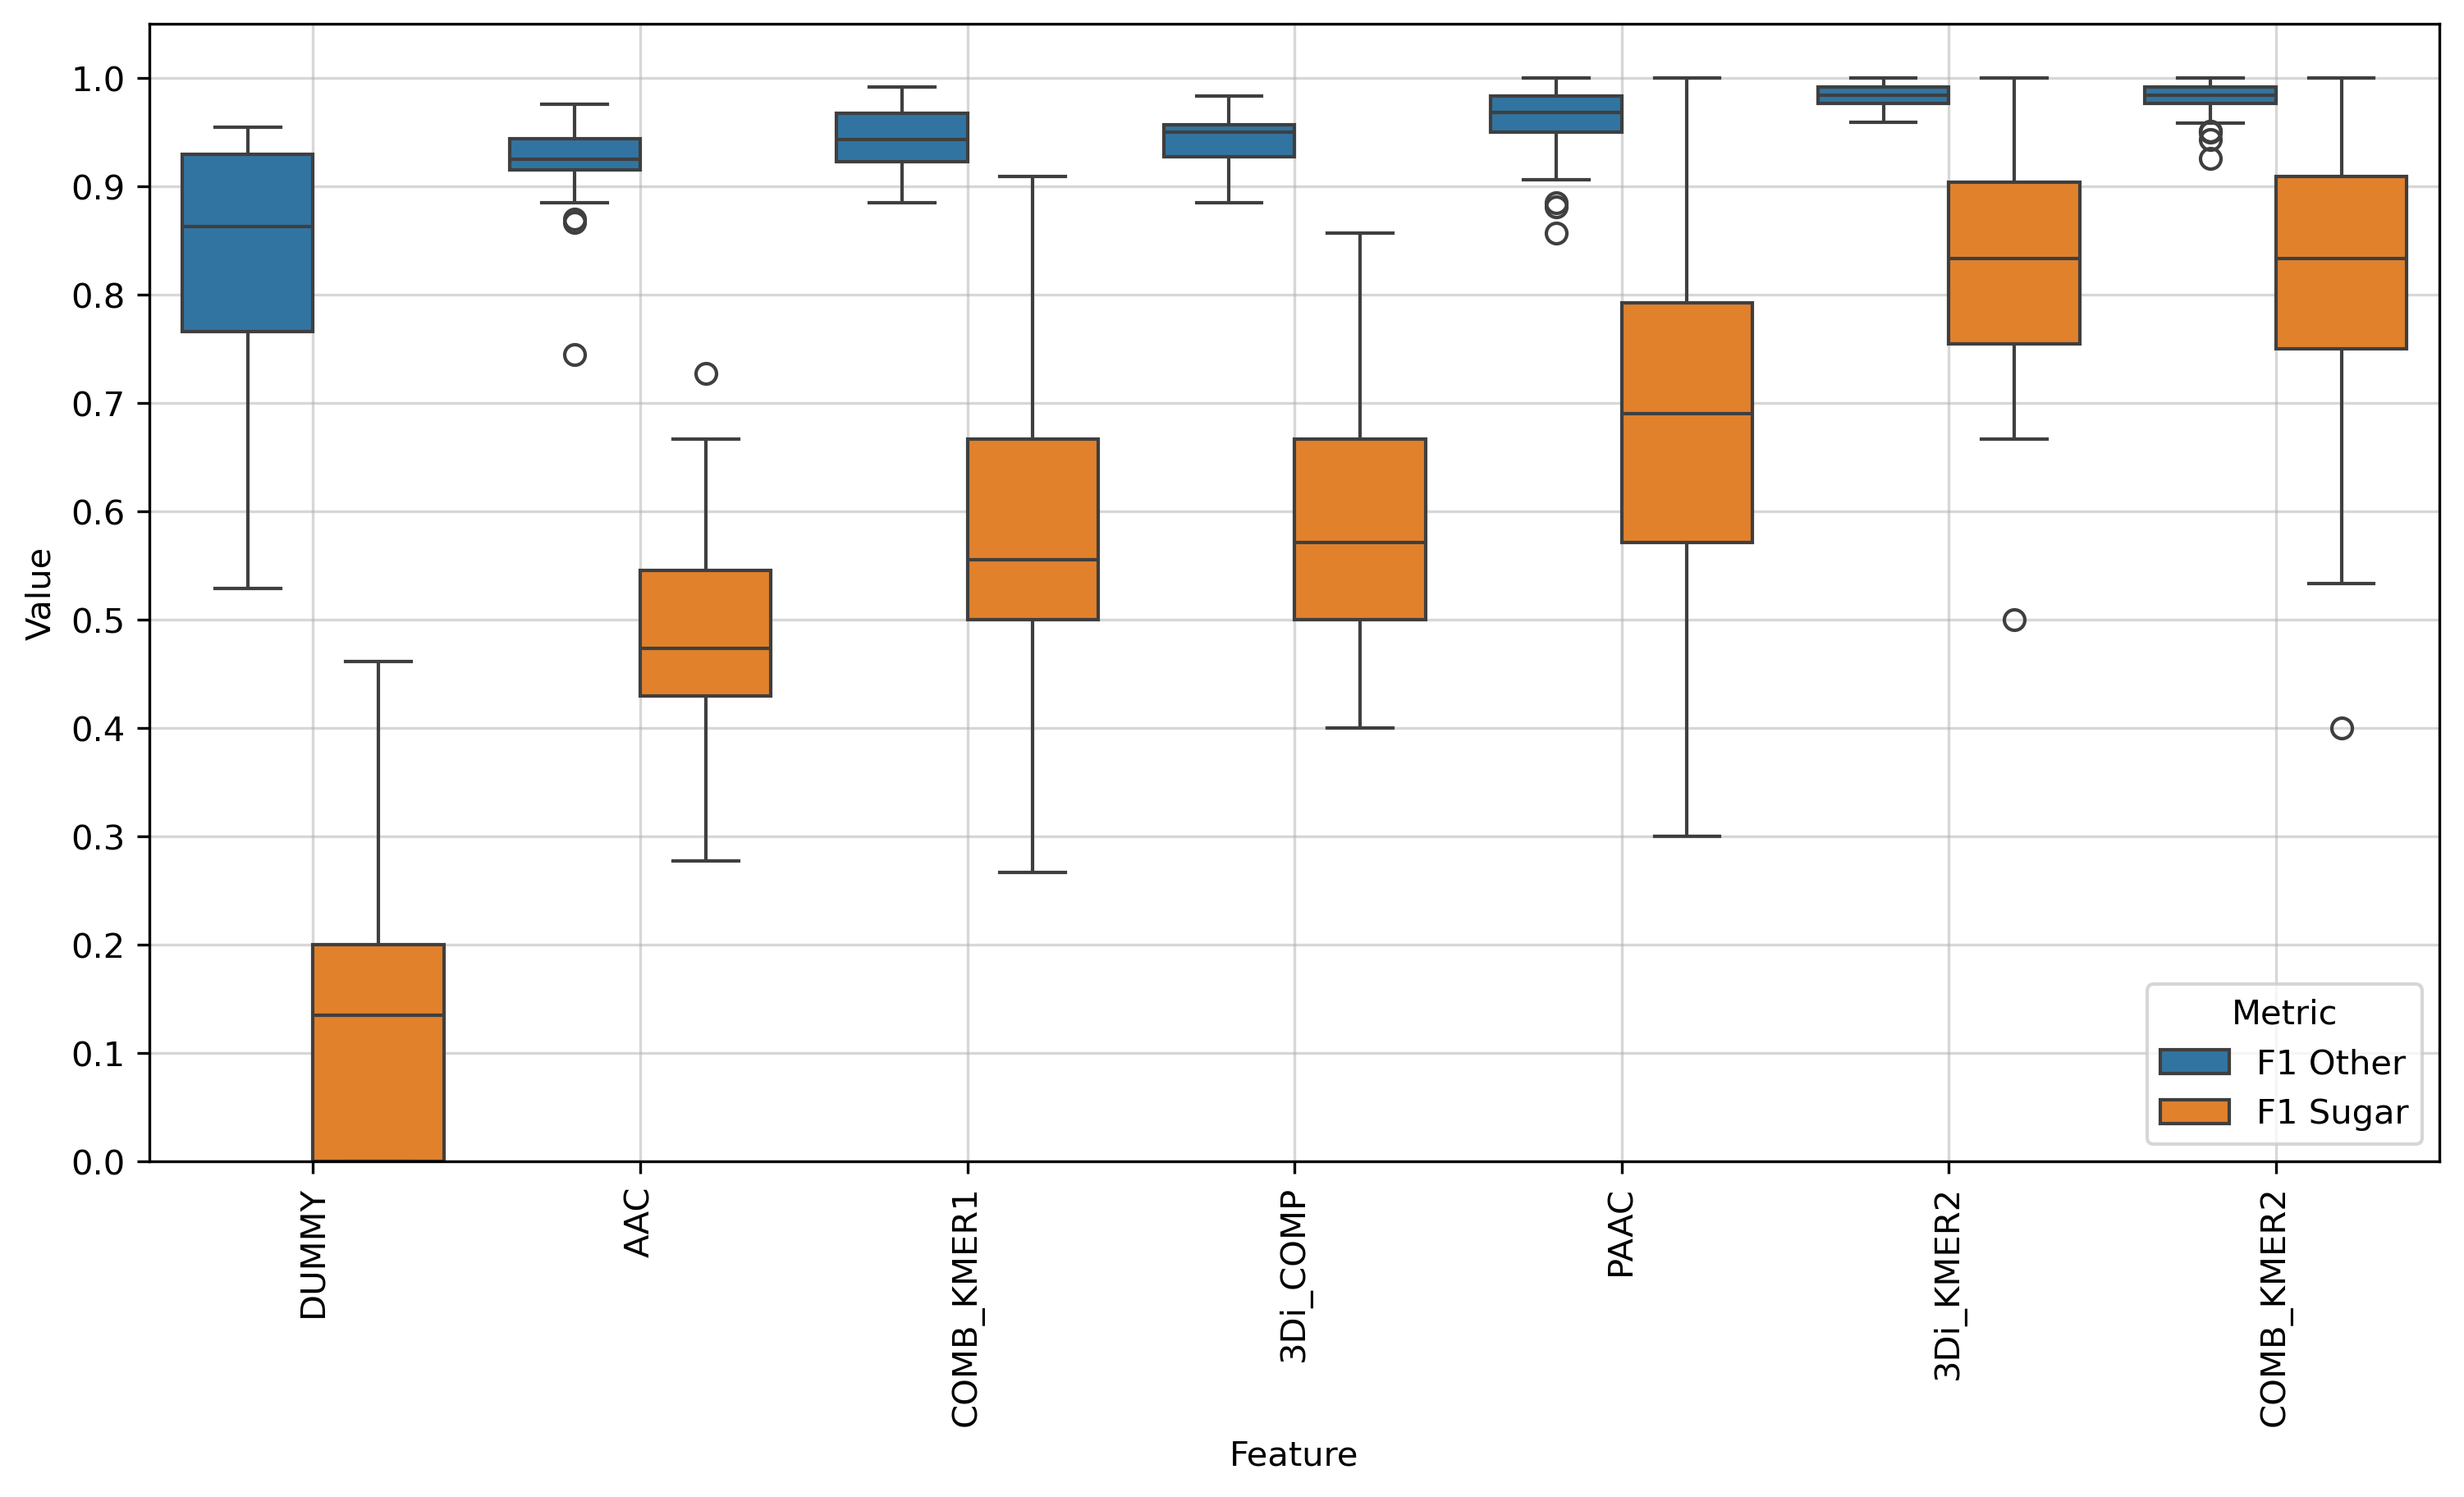

In [16]:
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
    metrics_include = ["F1 Sugar", "F1 Other"]
)

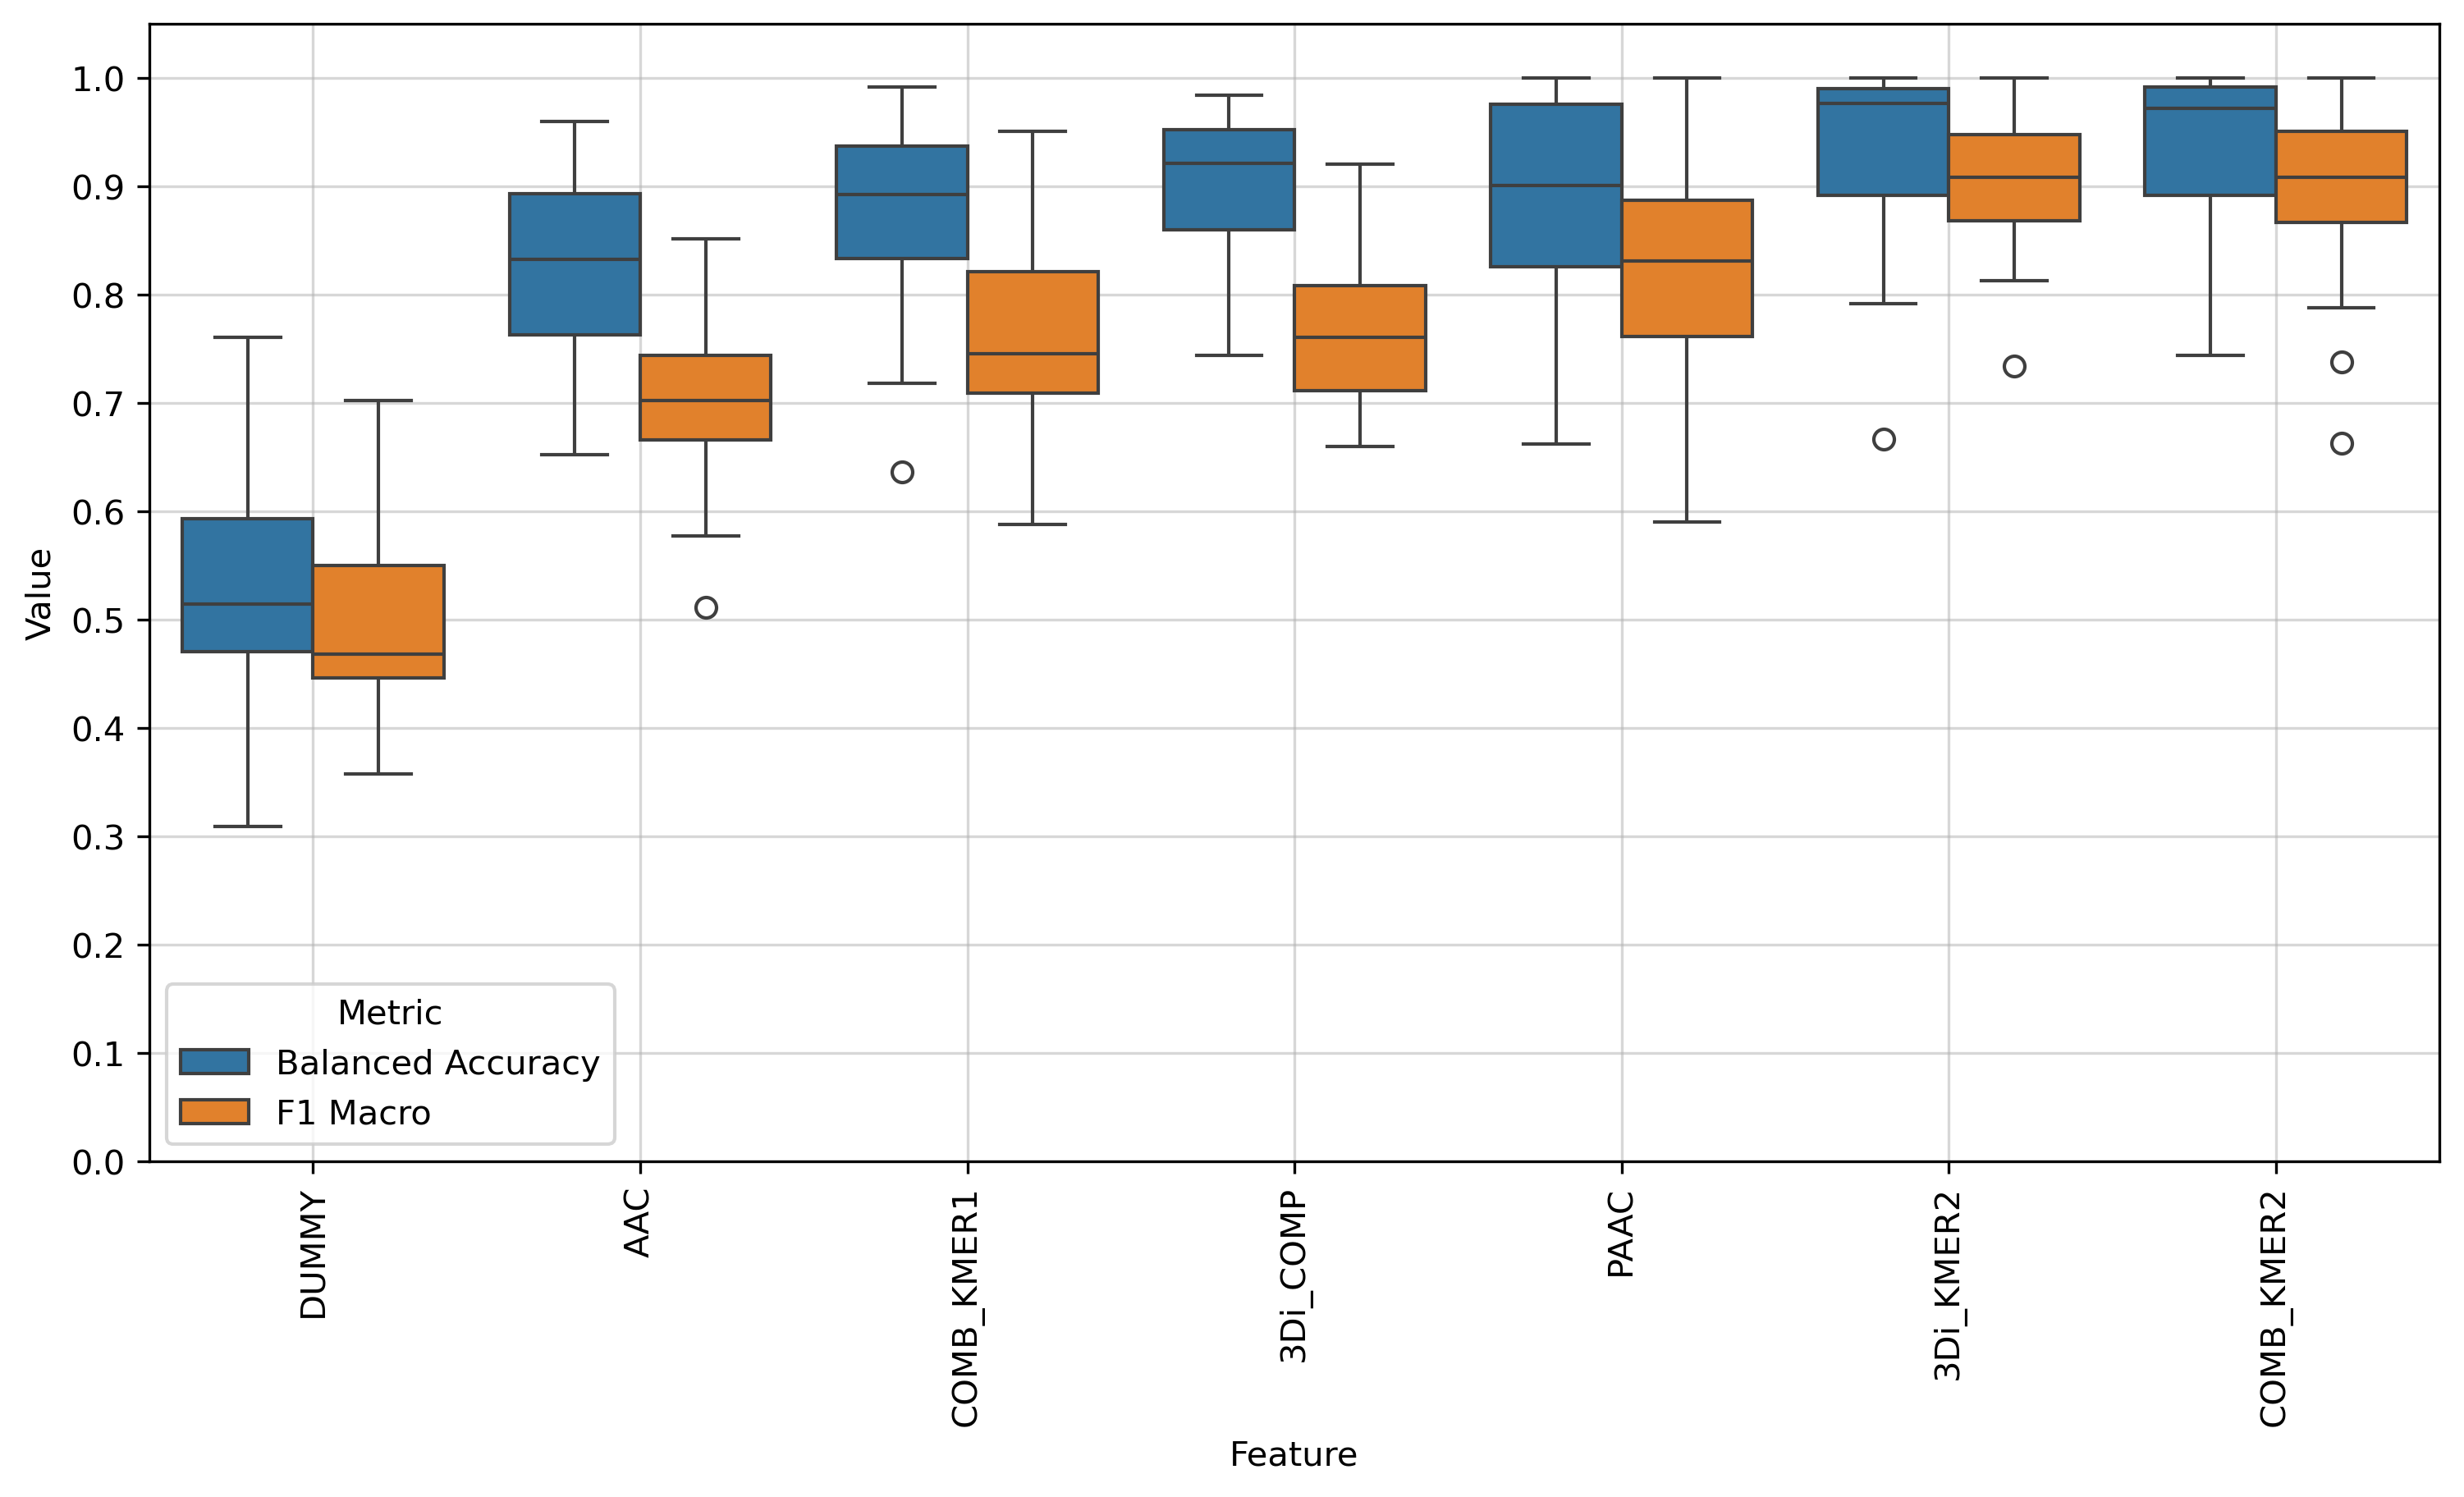

In [17]:
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
    metrics_include = ["F1 Macro", "Balanced Accuracy"]
)